In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [51]:
data_url = "https://drive.google.com/uc?export=download&id=1p7Jsds-nex-vASgYbB3wbpCZaIG1515D"
df = pd.read_csv(data_url)
df.head()

,Unnamed: 0,"Region, subregion, country or area *",Location code,ISO3 Alpha-code,ISO2 Alpha-code,Type,Parent code,indicator,gender,quintile,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,0,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Sudan,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df.shape

(5044, 87)

In [53]:
df.columns

Index(['Unnamed: 0', 'Region, subregion, country or area *', 'Location code',
       'ISO3 Alpha-code', 'ISO2 Alpha-code', 'Type', 'Parent code',
       'indicator', 'gender', 'quintile', 'ages', 'values are in percentage',
       'non-zero-year-columns', '1950.0', '1951.0', '1952.0', '1953.0',
       '1954.0', '1955.0', '1956.0', '1957.0', '1958.0', '1959.0', '1960.0',
       '1961.0', '1962.0', '1963.0', '1964.0', '1965.0', '1966.0', '1967.0',
       '1968.0', '1969.0', '1970.0', '1971.0', '1972.0', '1973.0', '1974.0',
       '1975.0', '1976.0', '1977.0', '1978.0', '1979.0', '1980.0', '1981.0',
       '1982.0', '1983.0', '1984.0', '1985.0', '1986.0', '1987.0', '1988.0',
       '1989.0', '1990.0', '1991.0', '1992.0', '1993.0', '1994.0', '1995.0',
       '1996.0', '1997.0', '1998.0', '1999.0', '2000.0', '2001.0', '2002.0',
       '2003.0', '2004.0', '2005.0', '2006.0', '2007.0', '2008.0', '2009.0',
       '2010.0', '2011.0', '2012.0', '2013.0', '2014.0', '2015.0', '2016.0',
       '201

In [54]:
#checking null values
df.isna().sum()

,0
Unnamed: 0,0
"Region, subregion, country or area *",0
Location code,0
ISO3 Alpha-code,0
ISO2 Alpha-code,0
...,...
2019.0,0
2020.0,0
2021.0,0
2022.0,0


In [55]:
#unique values
df.nunique()

,0
Unnamed: 0,5044
"Region, subregion, country or area *",1
Location code,1
ISO3 Alpha-code,1
ISO2 Alpha-code,1
...,...
2019.0,896
2020.0,871
2021.0,773
2022.0,761


In [56]:
df.dtypes
#types of data


,0
Unnamed: 0,int64
"Region, subregion, country or area *",object
Location code,int64
ISO3 Alpha-code,object
ISO2 Alpha-code,object
...,...
2019.0,float64
2020.0,float64
2021.0,float64
2022.0,float64


In [57]:
string_columns = df.select_dtypes(include=['object'])
string_columns.head()


,"Region, subregion, country or area *",ISO3 Alpha-code,ISO2 Alpha-code,Type,indicator,gender,ages
0,Sudan,SDN,SD,Country/Area,Administration of a nationally representative...,unknown,NaN
1,Sudan,SDN,SD,Country/Area,Administration of a nationally representative...,unknown,NaN
2,Sudan,SDN,SD,Country/Area,Administration of a nationally-representative...,unknown,NaN
3,Sudan,SDN,SD,Country/Area,Administration of a nationally-representative...,unknown,NaN
4,Sudan,SDN,SD,Country/Area,Administration of a nationally-representative...,unknown,NaN


In [68]:
df['Region, subregion, country or area *'].unique()

array(['Sudan'], dtype=object)

In [69]:
df['Region, subregion, country or area *'].value_counts()

,count
"Region, subregion, country or area *",
Sudan,5044


In [70]:
updated_df = df.drop('Region, subregion, country or area *', axis=1)
updated_df.head()

,Unnamed: 0,Location code,ISO3 Alpha-code,ISO2 Alpha-code,Type,Parent code,indicator,gender,quintile,ages,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,0,729,SDN,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,729,SDN,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,NaN,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,729,SDN,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
updated_df.columns

Index(['Unnamed: 0', 'Location code', 'ISO3 Alpha-code', 'ISO2 Alpha-code',
       'Type', 'Parent code', 'indicator', 'gender', 'quintile', 'ages',
       'values are in percentage', 'non-zero-year-columns', '1950.0', '1951.0',
       '1952.0', '1953.0', '1954.0', '1955.0', '1956.0', '1957.0', '1958.0',
       '1959.0', '1960.0', '1961.0', '1962.0', '1963.0', '1964.0', '1965.0',
       '1966.0', '1967.0', '1968.0', '1969.0', '1970.0', '1971.0', '1972.0',
       '1973.0', '1974.0', '1975.0', '1976.0', '1977.0', '1978.0', '1979.0',
       '1980.0', '1981.0', '1982.0', '1983.0', '1984.0', '1985.0', '1986.0',
       '1987.0', '1988.0', '1989.0', '1990.0', '1991.0', '1992.0', '1993.0',
       '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0', '2000.0',
       '2001.0', '2002.0', '2003.0', '2004.0', '2005.0', '2006.0', '2007.0',
       '2008.0', '2009.0', '2010.0', '2011.0', '2012.0', '2013.0', '2014.0',
       '2015.0', '2016.0', '2017.0', '2018.0', '2019.0', '2020.0', '2021.0',
 

In [72]:
updated_df['ISO3 Alpha-code'].unique()

array(['SDN'], dtype=object)

In [73]:
updated_df = updated_df.drop('ISO3 Alpha-code', axis=1)
updated_df.head()

,Unnamed: 0,Location code,ISO2 Alpha-code,Type,Parent code,indicator,gender,quintile,ages,values are in percentage,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,0,729,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,NaN,False,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,729,SD,Country/Area,912,Administration of a nationally representative...,unknown,9,NaN,False,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2,2,729,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,729,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,729,SD,Country/Area,912,Administration of a nationally-representative...,unknown,9,NaN,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
updated_df['ISO2 Alpha-code'].unique()

array(['SD'], dtype=object)

In [75]:
updated_df = updated_df.drop('ISO2 Alpha-code', axis=1)

In [76]:
updated_df['Type'].unique()

array(['Country/Area'], dtype=object)

In [77]:
updated_df = updated_df.drop('Type', axis=1)

In [78]:
updated_df['indicator'].unique()

array([' Administration of a nationally representative learning assessment in Grade 2 or 3 in mathematics (number)',
       ' Administration of a nationally representative learning assessment in Grade 2 or 3 in reading (number)',
       ' Administration of a nationally-representative learning assessment at the end of lower secondary education in mathematics (number)',
       ..., 'year', 'yearhdro', 'yearsdg'], dtype=object)

In [79]:
updated_df['indicator'].value_counts()

,count
indicator,
Administration of a nationally representative learning assessment in Grade 2 or 3 in mathematics (number),1
"Out-of-school rate for youth of upper secondary school age, both sexes (%)",1
"Out-of-school rate for youth of upper secondary school age, fourth quintile, adjusted location parity index (household survey data) (LPIA)",1
"Out-of-school rate for youth of upper secondary school age, fourth quintile, adjusted gender parity index (household survey data) (GPIA)",1
"Out-of-school rate for youth of upper secondary school age, female, adjusted wealth parity index (household survey data) (WPIA)",1
...,...
"Computer, communications and other services (% of commercial service exports)",1
"Compulsory education, duration (years)education",1
"Compulsory education, duration (years)",1


In [80]:
updated_df = updated_df.drop('indicator', axis=1)

In [81]:
updated_df['gender'].unique()

array(['unknown', 'female', 'male'], dtype=object)

In [82]:
updated_df['gender'].value_counts()

,count
gender,
unknown,3179
female,1119
male,746


In [83]:
type_variables = pd.get_dummies(updated_df['gender'], dtype=int)
type_variables.head()

,female,male,unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [84]:
updated_df = pd.concat([updated_df, type_variables], axis=1)
updated_df.head()

,Unnamed: 0,Location code,Parent code,gender,quintile,ages,values are in percentage,non-zero-year-columns,1950.0,1951.0,...,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,female,male,unknown
0,0,729,912,unknown,9,NaN,False,5,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1
1,1,729,912,unknown,9,NaN,False,5,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1
2,2,729,912,unknown,9,NaN,False,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,3,729,912,unknown,9,NaN,False,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,4,729,912,unknown,9,NaN,False,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [85]:
updated_df = updated_df.drop('gender', axis=1)
updated_df.head()

,Unnamed: 0,Location code,Parent code,quintile,ages,values are in percentage,non-zero-year-columns,1950.0,1951.0,1952.0,...,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,female,male,unknown
0,0,729,912,9,NaN,False,5,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1
1,1,729,912,9,NaN,False,5,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1
2,2,729,912,9,NaN,False,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,3,729,912,9,NaN,False,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,4,729,912,9,NaN,False,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1


In [86]:
updated_df['ages'].unique()

array([nan, '15+', '25+', '15-24', '15-19', '15-49', '7-14 ', '20-24',
       '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59',
       '60-64', '15+ ', '15-19 ', '20-24 ', '25+ ', '25-29 ', '30-34 ',
       '35-39 ', '40-44 ', '45-49 ', '50-54 ', '55-59 ', '60-64 ', '7-14',
       '0-14', '5 ', '20 to 79', '12-23 months', '15-24 ', '15-49 ',
       '50+ ', '15-64', '15 and o', '60', '15 and above', '30 and 70 ',
       '30 and 70', 'one', '15 ', '65 ', '80 ', '40 ', '60 ',
       '15 and 50 ', '15 and 60 ', '1 ', '15', '65', '80', '40',
       '15 and 50', '15 and 60', '10-14 ', '5-9 ', '0-14 ', '00-04',
       '05-09', '10-14', '15-64 ', '65 and above ', '65 and above',
       '65-69', '70-74', '75-79', '80 and above', '25 and o', '0', '1',
       '10', '11', '12', '13', '14', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '3', '4', '5', '6', '7', '8', '9',
       '10-15', '10-16', '10-17', '10-18', '11-15', '11-16', '11-17',
       '11-18', '12-1

In [87]:
updated_df['ages'].value_counts()

,count
ages,
15+,55
15-24,51
7-14,39
15-19,34
20-24,32
...,...
40,1
65 and above,1
15 and 60,1


In [88]:
type_variables = pd.get_dummies(updated_df['ages'], dtype=int)
type_variables.head()

,0,0-14,0-14,00-04,05-09,1,1,10,10-14,10-14,...,7-14,7-9,70-74,75-79,8,80,80,80 and above,9,one
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
updated_df = pd.concat([updated_df, type_variables], axis=1)
updated_df.head()

,Unnamed: 0,Location code,Parent code,quintile,ages,values are in percentage,non-zero-year-columns,1950.0,1951.0,1952.0,...,7-14,7-9,70-74,75-79,8,80,80,80 and above,9,one
0,0,729,912,9,NaN,False,5,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,729,912,9,NaN,False,5,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,729,912,9,NaN,False,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,729,912,9,NaN,False,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,729,912,9,NaN,False,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
updated_df = updated_df.drop('ages', axis=1)
updated_df.head()

,Unnamed: 0,Location code,Parent code,quintile,values are in percentage,non-zero-year-columns,1950.0,1951.0,1952.0,1953.0,...,7-14,7-9,70-74,75-79,8,80,80,80 and above,9,one
0,0,729,912,9,False,5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,729,912,9,False,5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,729,912,9,False,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,729,912,9,False,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,729,912,9,False,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# **Model Implementation**

In [91]:
data = updated_df

In [92]:
X = data.drop('non-zero-year-columns', axis=1)
y = data['non-zero-year-columns']

In [93]:
print(X.columns)

Index(['Unnamed: 0', 'Location code', 'Parent code', 'quintile',
       'values are in percentage', '1950.0', '1951.0', '1952.0', '1953.0',
       '1954.0',
       ...
       '7-14 ', '7-9', '70-74', '75-79', '8', '80', '80 ', '80 and above', '9',
       'one'],
      dtype='object', length=211)


In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3530, 211), (1514, 211), (3530,), (1514,))

In [97]:
print(X_train.dtypes)

Unnamed: 0                  int64
Location code               int64
Parent code                 int64
quintile                    int64
values are in percentage     bool
                            ...  
80                          int64
80                          int64
80 and above                int64
9                           int64
one                         int64
Length: 211, dtype: object


In [101]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = ['accuracy']
)

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.01 * 0.95 ** epoch)

epoch_number = 100

# Train the model
history = model.fit(X_train, y_train,
          epochs=epoch_number,
          batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[lr_schedule])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2453 - loss: 10.2893 - val_accuracy: 0.2424 - val_loss: 18.8580 - learning_rate: 0.0100
Epoch 2/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2479 - loss: 9.6218 - val_accuracy: 0.2424 - val_loss: 13.0744 - learning_rate: 0.0095
Epoch 3/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2555 - loss: 9.1356 - val_accuracy: 0.2424 - val_loss: 18.1778 - learning_rate: 0.0090
Epoch 4/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2561 - loss: 8.6543 - val_accuracy: 0.2424 - val_loss: 14.3771 - learning_rate: 0.0086
Epoch 5/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2572 - loss: 9.7349 - val_accuracy: 0.2424 - val_loss: 18.2554 - learning_rate: 0.0081
Epoch 6/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2511 - loss: 9.4374 - val_accuracy: 0.2424 - val_loss: 13.1129 - learning_rate: 0.0077
Epoch 7/100
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2

In [102]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 512)                 │         108,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 848,293 (3.24 MB)

 Trainable params: 282,593 (1.08 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 565,188 (2.16 MB)

In [103]:
y_prediction = model.predict(X_test)
y_prediction[:5]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[ 1.567898 ],
       [ 1.5678978],
       [54.154922 ],
       [60.55282  ],
       [ 1.5678973]], dtype=float32)

In [104]:
y_test.head()

,non-zero-year-columns
2336,1
391,1
2512,64
2488,64
1138,1


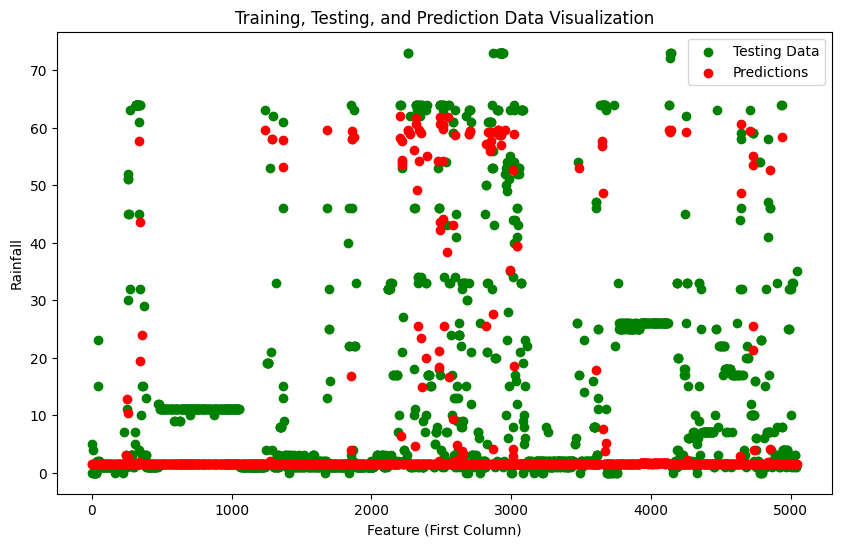

In [105]:

x_train_feature = X_train.values[:, 0]
x_test_feature = X_test.values[:, 0]

y_prediction = y_prediction.flatten() if len(y_prediction.shape) > 1 else y_prediction

# Plot
plt.figure(figsize=(10, 6))

plt.scatter(x_test_feature, y_test, c='g', label='Testing Data')
plt.scatter(x_test_feature, y_prediction, c='r', label='Predictions')
plt.xlabel("Feature (First Column)")
plt.ylabel("Rainfall")
plt.legend()
plt.title("Training, Testing, and Prediction Data Visualization")
plt.show()


In [106]:
# Create a MeanAbsoluteError instance
mae_metric = tf.keras.losses.MeanAbsoluteError()

# Calculate MAE
mae_value = mae_metric(y_test, y_prediction).numpy()

print(f"Mean Absolute Error: {mae_value}")


Mean Absolute Error: 11.29679012298584


In [107]:

mse_metric = tf.keras.losses.MeanSquaredError()


mse_value = mse_metric(y_test, y_prediction).numpy()

print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 365.6320495605469


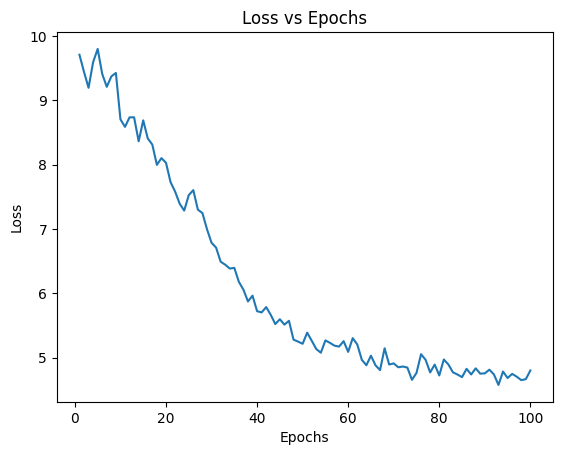

In [108]:
x_range = range(1, epoch_number+1)
loss= history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()